In [1]:
import numpy as np
import pandas as pd
import keras

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
len(df)

42000

In [24]:
from sklearn.model_selection import train_test_split

seed = 22

x = df.copy()
y = keras.utils.to_categorical(df['label'])
del x['label']
x /= 255

x_train_val, x_test = train_test_split(x, random_state=seed, test_size=0.1)
x_train, x_val = train_test_split(x_train_val, random_state=seed, test_size=0.15)

y_train_val, y_test = train_test_split(y, random_state=seed, test_size=0.1)
y_train, y_val = train_test_split(y_train_val, random_state=seed, test_size=0.15)

In [33]:
from keras.preprocessing.image import array_to_img


def get_image_and_label(id: int):
    print(np.where(y[id] == 1)[0][0])
    return array_to_img(x.loc[id].to_numpy().reshape(28, 28, 1))

In [34]:
get_image_and_label(22)

2


In [35]:
x_val.shape[1:]

(784,)

In [36]:
input = keras.layers.Input(shape=x_val.shape[1:])
hidden = keras.layers.Dense(100, activation='relu')(input)
output = keras.layers.Dense(10, activation='softmax')(hidden)

model = keras.Model(input, output)

In [37]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
optimizer = keras.optimizers.legacy.SGD(learning_rate=0.01)  # stochastic Gradient descent
loss = keras.losses.CategoricalCrossentropy()
metrics = ['accuracy']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [48]:
history = model.fit(x=x_train, y=y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1005/1005 [==============================] - 1s 938us/step - loss: 0.1098 - accuracy: 0.9709 - val_loss: 0.1454 - val_accuracy: 0.9557
Epoch 2/10
1005/1005 [==============================] - 1s 863us/step - loss: 0.1071 - accuracy: 0.9714 - val_loss: 0.1434 - val_accuracy: 0.9563
Epoch 3/10
1005/1005 [==============================] - 1s 893us/step - loss: 0.1042 - accuracy: 0.9723 - val_loss: 0.1429 - val_accuracy: 0.9591
Epoch 4/10
1005/1005 [==============================] - 1s 876us/step - loss: 0.1019 - accuracy: 0.9729 - val_loss: 0.1406 - val_accuracy: 0.9575
Epoch 5/10
1005/1005 [==============================] - 1s 879us/step - loss: 0.0993 - accuracy: 0.9733 - val_loss: 0.1377 - val_accuracy: 0.9589
Epoch 6/10
1005/1005 [==============================] - 1s 921us/step - loss: 0.0969 - accuracy: 0.9745 - val_loss: 0.1421 - val_accuracy: 0.9568
Epoch 7/10
1005/1005 [==============================] - 1s 950us/step - loss: 0.0948 - accuracy: 0.9743 - val_loss: 0.1365 -

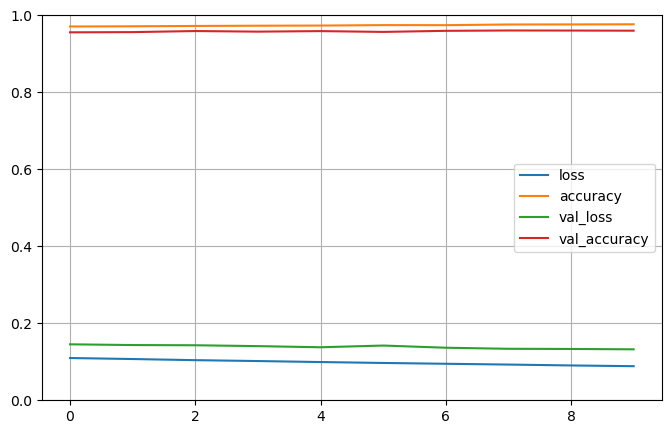

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1] 
plt.show()

In [50]:
model.predict(x_test)

132/132 [==============================] - 0s 533us/step


array([[1.07082956e-08, 1.03118175e-04, 2.52555357e-04, ...,
        2.65333876e-02, 2.56131869e-04, 2.27087196e-02],
       [2.96521903e-04, 6.94837695e-07, 1.46362360e-03, ...,
        1.12932339e-08, 9.12370160e-05, 3.08297956e-07],
       [7.40718065e-08, 1.59802835e-03, 3.67782149e-03, ...,
        2.77869185e-06, 8.04758514e-04, 9.24533936e-07],
       ...,
       [4.84838232e-08, 8.54608661e-05, 6.69794797e-04, ...,
        7.85710341e-08, 7.53153799e-05, 2.57526026e-05],
       [6.90711204e-07, 8.64202505e-08, 1.96374269e-04, ...,
        2.01002013e-06, 1.59645879e-07, 1.43178286e-05],
       [4.15345802e-09, 8.07085598e-05, 5.12294646e-05, ...,
        8.52626254e-05, 1.21824746e-03, 7.88105369e-01]], dtype=float32)